# 9. 聊天机器人
你知道聊天机器人吗？随着人工智能的发展，我们可以在越来越多的地方见到聊天机器人，比如手机上的 Siri，Windows 电脑上的小娜 Cortana，还有各种各样自带聊天功能的人形机器人。本单元我们将从制作简单的聊天机器人入手，了解它的基本工作原理，再训练更加“智能”的聊天机器人，一起来设计自己的聊天机器人吧！
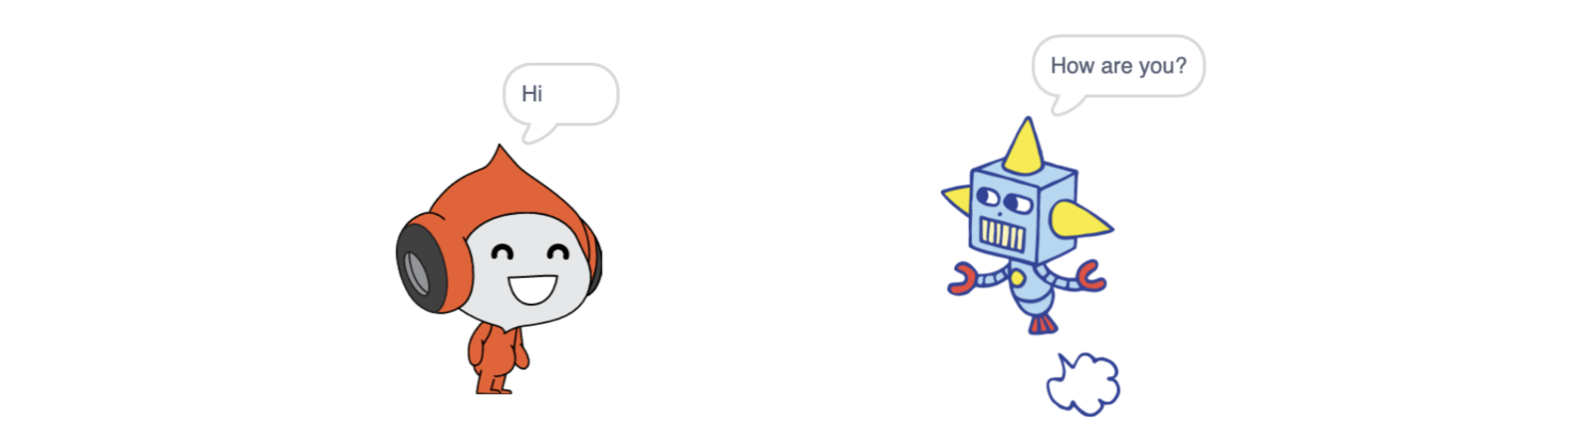

## 简单聊天机器人
Eliza 是 MIT 人工智能实验室在 1964-1966 年开发的世界上第一个聊天机器人，运行以下代码，先和她聊一聊吧，目前只支持英文。

In [ ]:
from IPython.display import IFrame

IFrame('http://psych.fullerton.edu/mbirnbaum/psych101/Eliza.htm', width="100%", height=500)

其实，聊天机器人可以简单理解为能够回复你的一种程序，我们先来制作一个简单的聊天机器人，设定简单的回复规则。

In [ ]:
import random

def talk():
    response = ['谁说不是呢？', '哈哈哈哈哈', '嗯嗯', '然后呢？', '哇哦！']
    print('* {}'.format(random.choice(response)))
    
while True:
    # input() 可以获取用户输入的内容，并将它转换成字符串
    input_text = input('>')
    talk()  

如果想让聊天机器人变得更加个性化，比如拥有名字，可以告诉我们天气信息，那么可以定义一个聊天机器人“对象(object)”。对象具有属性（如名字）和方法（如聊天）。

### 编程百科
#### 类与对象
Python 中万物皆对象，比如字符串、数字也是对象。创建一个对象前需要先使用 class 关键字定义一个类。
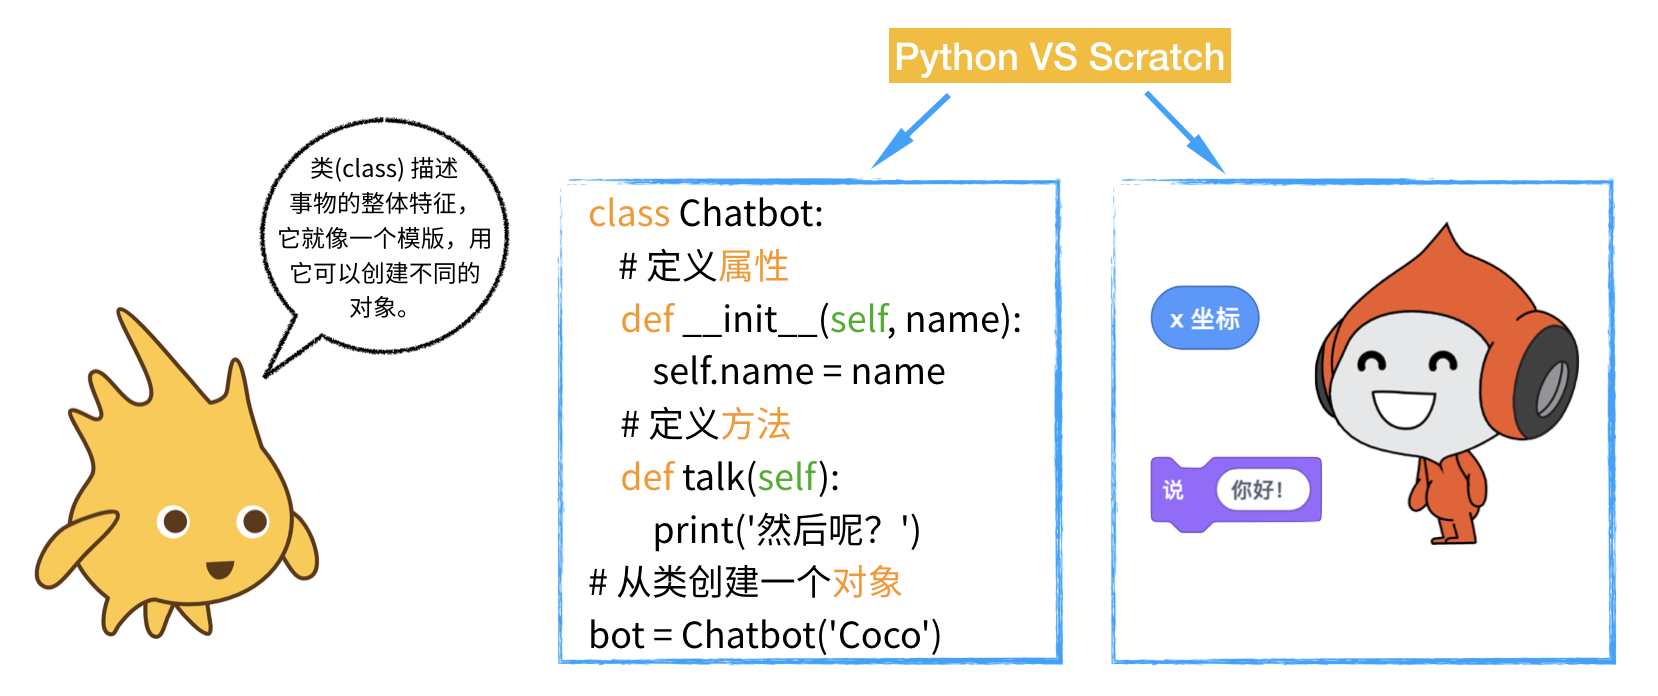
注意类名首字母要大写，类具有属性 (attribute) 和方法 (method)。定义类时使用了初始化类的 \_\_init\_\_() 来设置属性，当创建一个新的对象时，\_\_init\_\_() 就会自动运行，类中定义的函数称为方法。

In [ ]:
import random

class Chatbot:
    def __init__(self, name): # init 前后都有两个下划线_
        self.name = name
        print('你好，我是{}'.format(self.name))
        
    def talk(self):
        response = ['谁说不是呢？', '哈哈哈哈哈', '嗯嗯', '然后呢？', '哇哦！']
        print('* {}'.format(random.choice(response)))
            
# 创建一个对象
bot1 = Chatbot('R2D2')
# 获取对象的属性
print(bot1.name)
# 调用对象的方法
bot1.talk()      

回顾一下，之前的学习过程中是不是也调用过对象的方法？比如对字符串进行格式化 str.format()。为什么要使用对象呢？对象是对物理世界中事物的一种很好的抽象，它可以让我们用习惯的方式思考，比如猫有颜色（属性），会爬树（方法）。

#### 编程解密
定义类的时候，参数 self 代表什么意思呢？对象是类的一个实例（instance），self 代表类的实例。举个例子：

In [ ]:
class Animal:
    def __init__(self, greeting):
        self.greeting = greeting
    
    def say(self):
        print(self.greeting)
        
cat = Animal('meow')
cat.say()

因为 self 代表实例，所以 self.greeting 代表实例的属性，所以调用 cat.say() 时才会打印出 meow。在调用 cat.say() 时，不需要填入 self 对应的参数，因为 Python 内部会将 cat.say() 转化成 Animal.say(cat)。

#### 类的继承
在生物学上有遗传的现象，即生物后代会继承父母的特征。在 Python 中，类也可以继承，通过继承创建的类称为子类 (derived class)，被继承的类称为父类 (base class)。子类可以继承父类的属性和方法，子类也可以有自己的属性和方法，即共性之中的特性。

In [ ]:
# 类的继承
class Copybot(Chatbot):
    def __init__(self, name, birthday):
        Chatbot.__init__(self, name)  # 使用父类的初始化方法设置属性
        self.birthday = birthday  # 添加新属性“生日”
        
    # 定义新的方法       
    def copytalk(self, input):
        response = ['嗯嗯', '然后呢', '你真棒！']
        print('* {}, {}'.format(input, random.choice(response)))
        
copybot = Copybot('复读机', '6.12')
print(copybot.birthday)
copybot.talk()

while True:
    input_text = input('>')
    copybot.copytalk(input_text) 

这里定义了一个新的 Copybot 类，它继承 Chatbot 的属性和方法，Copybot 类定义了新的属性和方法。通过继承的方式可以让代码复用，这样代码会更简洁。

In [ ]:
# 继承 Chatbot，如果不添加新属性，不用初始化
class Testbot(Chatbot):
    def talk(self, input):
        response = ['嗯嗯', '然后呢', '你真棒！']
        print('* {}, {}'.format(input, random.choice(response)))

testbot = Testbot('testbot')
print(testbot.name)

while True:
    input_text = input('>')
    testbot.talk(input_text) 

注意，这里 Testbot 类重新定义了 talk() 方法，如果子类定义了和父类同名的方法，以子类为主。

## 训练聊天机器人
Eliza 使用模式匹配的方式来聊天，即它针对可能的问题设置了对应的答案，聊天过程中，Eliza 会根据问题查找最匹配的答案。我们也用模式匹配的方式训练一个聊天机器人。先运行以下单元格安装 python-aiml 库。**注意**：Adapter 4.8.1 以上的版本已内置 python-aiml 库，不需要再次安装。

In [ ]:
# 安装 python-aiml 库
import pip

pip.main(["install", "python-aiml"])

获取当前目录的绝对路径，训练聊天机器人时会用到。

In [ ]:
import os

# 获取当前目录的路径
os.getcwd()

语料库是一系列设置好了问题和答案的数据，我们使用 python-aiml 库中的语料库来训练聊天机器人。

In [ ]:
import os
import aiml

# 先运行上一段代码获取当前目录的路径，在此基础上添加语料库的路径，语料库在交互计算文件夹下面的 assets/botdata/alice 中
# Windows 路径示例，请根据语料库的实际位置设置文件路径
file_path = 'C:\\Users\\hello\\codelab_adapter\\notebooks\\交互计算' + '/assets/botdata/alice'

'''
# Mac 路径示例
file_path = '/Users/hello/codelab_adapter/notebooks/交互计算' + '/assets/botdata/alice'
'''

# 将工作目录修改至语料库
os.chdir(file_path)
# 从 Kernel 类创建一个对象
bot = aiml.Kernel()
# 导入并学习 startup.xml 文件
bot.learn('startup.xml')
# 学习所有以 .aiml 结尾的文件，即学习语料库
bot.respond('LOAD ALICE')

while True:
    input_text = input('>')
    # 根据问题回复答案
    response = bot.respond(input_text)
    print('* ' + response)

把代码改写成对象的形式，这样可以赋予聊天机器人新的属性或方法，如名字，并且用 Scratch 设计一个聊天界面，这样聊天就更加自然了。

In [ ]:
#【交互计算】聊天机器人 https://create.codelab.club/projects/9749/editor/
from IPython.display import IFrame

IFrame('https://create.codelab.club/projects/9749/editor/', width="100%", height=500)

In [ ]:
# 【交互计算】聊天机器人 https://create.codelab.club/projects/9749/editor/
import os
import time
import aiml
from codelab_adapter_client.message import send_message, receive_message

# Windows 路径示例，请根据语料库的实际位置设置文件路径
file_path = 'C:\\Users\\hello\\codelab_adapter\\notebooks\\交互计算' + '/assets/botdata/alice'

'''
# Mac 路径示例
file_path = '/Users/hello/codelab_adapter/notebooks/交互计算' + '/assets/botdata/alice'
'''
os.chdir(file_path)
chatbot = aiml.Kernel()
chatbot.learn('startup.xml')
chatbot.respond('LOAD ALICE')

class Chatbot:
    def __init__(self, name):
        self.name = name
        print("Hi, I'm {}".format(self.name))
    
    def respond(self, input):
        res = chatbot.respond(input)
        return res
        
jack = Chatbot('Jack')
send_message("Hi, I'm {}".format(jack.name))

while True: 
    msg = receive_message()
    if msg:
        res = jack.respond(msg)
        time.sleep(1) 
        send_message(res)

### 个性化聊天机器人
前面的聊天机器人是使用 python-aiml 库自带的语料库训练的，不同的语料库训练出的聊天机器人不同。我们也可以设计自己的语料库，先新建一个启动文件，设置要学习的语料库，并将文件保存为 startup.xml。

In [ ]:
<aiml version="1.0">

<category>
<pattern>LOAD JACK</pattern>
<template>

<!-- Load JACK AIML set -->
<learn>jack.aiml</learn>

</template>
</category>

</aiml>

接下来设计一个 jack.aiml 的语料库，将它保存到 startup.xml 同一个目录下。把问题和答案写进去。注意，英文问题要用大写，你可以添加中文的问题和答案。如果想添加随机回答，可以参考这个[教程](https://www.biaodianfu.com/python-aiml.html)。

In [ ]:
<aiml version="1.0.1" encoding="UTF-8">
<!-- jack.aiml -->
    <category>
        <pattern>HELLO</pattern>
        <template>Hello, I'm Jack</template>
    </category>
    <category>
        <pattern>HOW OLD ARE YOU</pattern>
        <template>I'm 16.</template>
    </category>
    <category>
        <pattern>你好</pattern>
        <template>你好呀</template>
    </category>    
</aiml>

使用新的语料库训练聊天机器人，运行程序看看效果。

In [ ]:
import os
import aiml

# Windows 路径示例，请根据语料库的实际位置设置文件路径
file_path = 'C:\\Users\\hello\\codelab_adapter\\notebooks\\交互计算' + '/assets/botdata/jack'

'''
# Mac 路径示例
file_path = '/Users/hello/codelab_adapter/notebooks/交互计算' + '/assets/botdata/jack'
'''
os.chdir(file_path)
bot = aiml.Kernel()
bot.learn('startup.xml')
# 注意，这里要改成 LOAD JACK
bot.respond('LOAD JACK')

while True:
    input_text = input('>')
    response = bot.respond(input_text)
    print('* ' + response)

使用模式匹配训练机器人严重依赖语料库，它适合有限问题数量的场景，比如客服机器人。随着 AI 技术的发展，基于自然语言处理的聊天机器人可以理解更加复杂和开放的问题，而且具有动态学习能力，它们正变得越来越聪明。

## 拓展
发挥自己的想象，进一步拓展聊天机器人项目，并将作品分享到[【交互计算】聊天机器人](https://create.codelab.club/studios/425)工作室，看看工作室中其他人创作的作品。
1. 你能训练两个聊天机器人并让他们对话吗？

2. 创建中文语料库，训练一个中文聊天机器人，你还可以尝试使用语音识别和语音合成拓展实现语音聊天。

### 参考资料
- [基于 AIML 的 Python 聊天机器人搭建](https://www.biaodianfu.com/python-aiml.html)